In [1]:
import numpy as np
import MDAnalysis as md 
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.ticker as ticker
import statsmodels.api as sm 
import pylab as py
from scipy.stats import shapiro

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(15,10)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
#systems=["IA","PA","FA_G-prot","FA_no_G-prot"]
systems=["IA","PA"]
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "FA_no_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "IA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "PA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6"}

unique_lipids = ["POPC", "POPS", "POPA", "POPG", "POPE", "CHOL", "DPG3", "DPSM", "PAP6"]
color_systems = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3"]
line_style = ["solid", "dotted", "dashed"]
color_rep = ["#1b9e77","#d95f02","#7570b3"]

In [4]:
data_dir_rim = {"IA":"",
           "PA":"",
           "FA_no_G-prot":"",
           "FA_G-prot":""}

data_dir_tot = {"IA":"",
           "PA":"",
           "FA_no_G-prot":"",
           "FA_G-prot":""}

In [5]:
for s in systems:
    for lipid in unique_lipids:
        D_rim = [ np.loadtxt("SELECTION/{0:s}_{1:d}_{2:s}_0.7nm_size.xvg".format(s,r,lipid), 
                        comments=('#','@')) for r in range(3) ]
        D_tot = [ np.loadtxt("SELECTION/{0:s}_{1:d}_{2:s}_total_size.xvg".format(s,r,lipid), 
                        comments=('#','@')) for r in range(3) ]
        data_dir_rim[s] = D_rim
        data_dir_tot[s] = D_tot

In [6]:
d = data_dir_rim['IA']

In [7]:
def half_data (d):
    shapes = [ i.shape[0] for i in d]
    halfs = [ int(i/2) for i in shapes]
    data_half = [ d[i][halfs[i]:,1] for i in range(3)]
    return data_half

In [8]:
d_h = half_data(d)

In [9]:
from scipy.stats import probplot
from scipy.stats import normaltest

In [10]:
normaltest(d_h[0])

NormaltestResult(statistic=159.20189709611017, pvalue=2.6899691004776994e-35)

((array([-3.97674353, -3.76048147, -3.64213988, ...,  3.64213988,
          3.76048147,  3.97674353]),
  array([108., 115., 117., ..., 205., 207., 207.])),
 (13.92922789495849, 160.5232839431509, 0.9986294003582719))

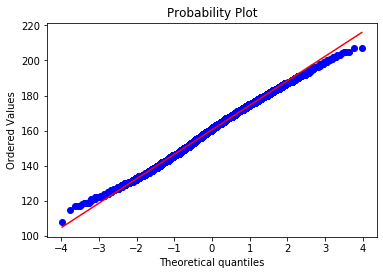

In [11]:
probplot(d_h[0], plot=plt)

In [12]:
shapiro(d_h[2])

/home/au447022/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9982922673225403, 8.208243582028232e-17)

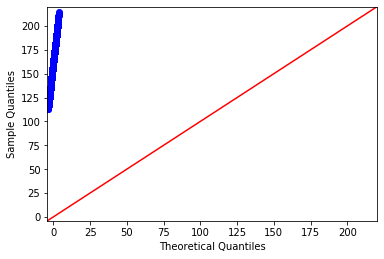

In [13]:
sm.qqplot(d_h[1], line ='45') 
py.show()

In [16]:
np.mean(d_h[1])

162.42062572421784

In [17]:
np.var(d_h[2])

193.5676874468148